Tugas Kelompok PBA

In [ ]:
!pip install datasets

     |████████████████████████████████| 290 kB 5.2 MB/s 
     |████████████████████████████████| 132 kB 54.3 MB/s 
     |████████████████████████████████| 243 kB 48.9 MB/s 
     |████████████████████████████████| 1.1 MB 23.6 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 160 kB 56.4 MB/s 
     |████████████████████████████████| 192 kB 51.2 MB/s 
     |████████████████████████████████| 271 kB 52.8 MB/s 


In [ ]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

Downloading:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train = dataset.data["train"].to_pandas()
train.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis:


In [ ]:
labels = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']

feats_df = train.drop(columns = labels)
labels_df = train[labels]

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Cleaning Data

In [ ]:
import re
def clean_text(text):
    # menghapus backslash dan apostrophe 
    text = re.sub("\'", "", text) 
    # menghapus semua karakter selain alfabet
    text = re.sub("[^a-zA-Z]"," ",text) 
    # menghapus whitespaces 
    text = ' '.join(text.split()) 
    # mengubah teks ke lowercase
    text = text.lower() 
    
    return text

In [ ]:
feats_df['texts'] = feats_df['text'].apply(lambda x: clean_text(x))

In [ ]:
feats_df['text'] = feats_df['texts']

In [ ]:
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,texts
0,that game hurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,that game hurt
1,sexuality shouldn t be a grouping category it ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sexuality shouldn t be a grouping category it ...
2,you do right if you dont care then fuck em,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,you do right if you dont care then fuck em
3,man i love reddit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,man i love reddit
4,name was nowhere near them he was by the falcon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,name was nowhere near them he was by the falcon


## Visualisasi Frekuensi Kata

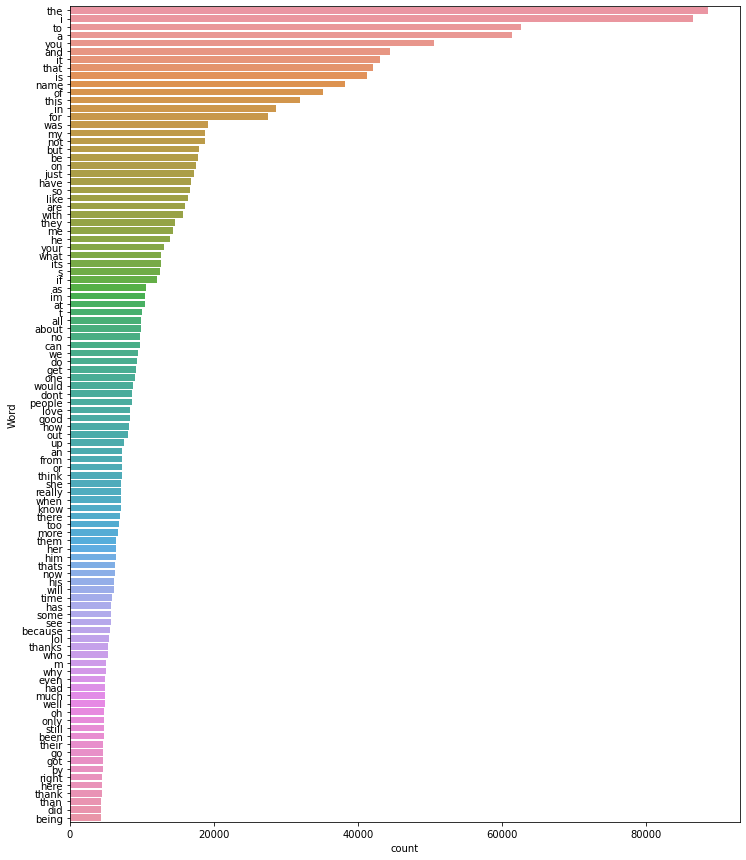

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # memilih top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualisasi masing-masing kata dan frekuensi nya
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(feats_df['text'], 100)

## Stopword Removal

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

feats_df['texts'] = feats_df['text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
feats_df['text'] = feats_df['texts']
feats_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,texts
0,game hurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,game hurt
1,sexuality grouping category makes different ot...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sexuality grouping category makes different ot...
2,right dont care fuck em,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,right dont care fuck em
3,man love reddit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,man love reddit
4,name nowhere near falcon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,name nowhere near falcon


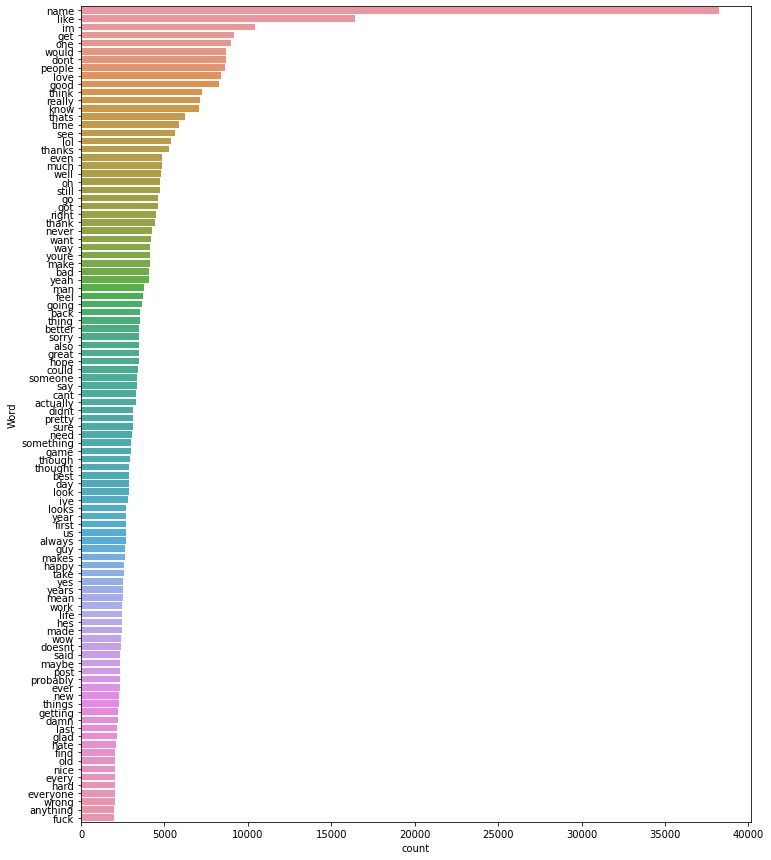

In [ ]:
freq_words(feats_df['text'], 100)

## Tokenization

In [ ]:
from nltk.tokenize import SpaceTokenizer
from nltk.tokenize import word_tokenize

words = []

for i in range(0, feats_df['text'].size):
  sTokenizer = SpaceTokenizer()
  words.append(sTokenizer.tokenize(feats_df['text'][i]))


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 
# choose some words to be stemmed
my_words = ["program", "programs", "programmer", "programming", "programmers"]
 
# for w in words[0]:
#     print(w, " : ", ps.stem(w))

print(word)

game  :  game
hurt  :  hurt
